Logistic Regression
===================

## A Two-dimensional data
### Tasks: Visualize the data, train a classifier, visualize the result with decision boundary

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

First, we generate some data to train to train with.

In [90]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2)   # generate dataset consisting of two Gaussian clusters

Shape of the data: Take a look at how large the data is and what the labels look like:

In [91]:
print("X.shape:", X.shape) 
print("y: ", y)
len(y[y==0])

X.shape: (100, 2)
y:  [1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0
 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1
 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1]


50

As the data is two-dimensional, we can easily visualize it:

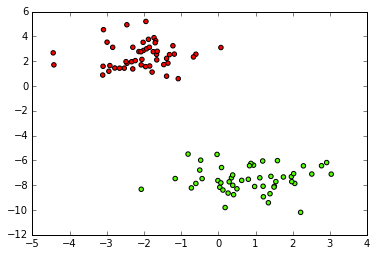

In [92]:
plt.prism()
plt.scatter(X[:, 0], X[:, 1], c=y)

Import logistic regression from scikit-learn and generate a classification object.

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

Split the dataset into a training set and a test set.

In [94]:
X_train = X[:50]
y_train = y[:50]
X_test = X[50:]
y_test = y[50:]

To get an idea of how hard the task is, let us visualize the data again, this time only labeling the training points.

The test points are plottet as white triangles.
Can we see which class the test points belong to?

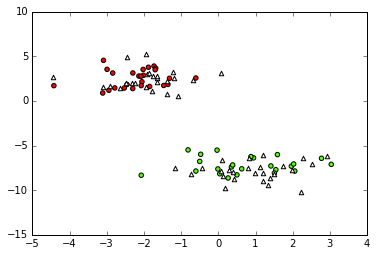

In [95]:
plt.prism()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c='white', marker='^')

Now let's fit the logistic regression model to the training data, to see if we can do it automatically:

In [96]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

First, we have a look at how logistic regression did on the training set.

We do this by now setting colors using the predicted class.

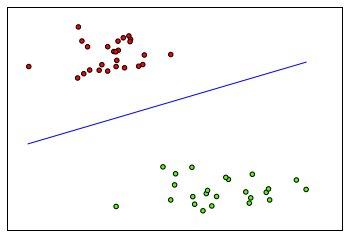

In [97]:
from utility import plot_decision_boundary
y_pred_train = logreg.predict(X_train)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train)
plot_decision_boundary(logreg, X)

That looks pretty good. It is not always that easy to inspect the result visually,
so we can also use the logistic regression object to calculate a core for us:

In [98]:
print("Accuracy on training set:", logreg.score(X_train, y_train))

Accuracy on training set: 1.0


1.0 means an accuracy of 100%, just as it looked like.

Now let us have a look at how the algorithm generalizes to the test data.

Accuracy on test set: 1.0


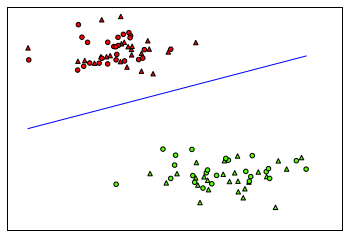

In [99]:
y_pred_test = logreg.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test, marker='^')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train)
plot_decision_boundary(logreg, X)
print("Accuracy on test set:", logreg.score(X_test, y_test))

We can also take a look at the coefficients, but they probably don't tell you much.

In [100]:
logreg.coef_

array([[ 0.78053631, -0.99598727]])

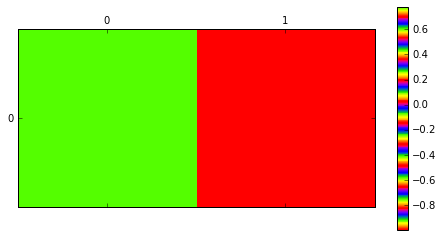

In [101]:
plt.matshow(logreg.coef_)
plt.colorbar()

## B MNIST DIGITS
-------------
Let's go back to the MNIST example of before.
This dataset is a bit more exciting since it is much higher dimensional and not as easy to separate.
First we load the data again

In [105]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
X_digits, y_digits = mnist.data, mnist.target

Remember what the dataset looks like:

- 70000 examples, 784 dimensional
- ten classes, 0-9
- each 784 vector is a 28 * 28 digit

In [106]:
print("X.shape:", X_digits.shape) 
print("y: ", y_digits)
len(y_digits[y_digits==8])

X.shape: (70000, 784)
y:  [ 0.  0.  0. ...,  9.  9.  9.]


6825

In [107]:
print("X_digits.shape:", X_digits.shape)
print("Unique entries of y_digits:", np.unique(y_digits))

X_digits.shape: (70000, 784)
Unique entries of y_digits: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


0.0


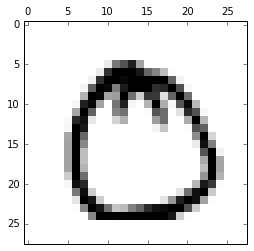

In [108]:
print(y_digits[1000])
plt.rc("image", cmap="binary")
plt.matshow(X_digits[1000].reshape(28, 28))

We could try to learn all ten classes with logistic regression, but let us keep with two classes for the moment.
We will use two classes that are quite hard to distinguish: seven and nine.
First 0 and 1.

To create a dataset only consisting of the classes zero and one, we need a new numpy trick!

We can not only slice our data using ranges, like ``X[5:10]``, we can also select elements using conditions, like so:

In [109]:
zeros = X_digits[y_digits==0]  # select all the rows of X where y is zero (i.e. the zeros)
ones = X_digits[y_digits==1]   # select all the rows of X where y is one (i.e. the ones)
print("zeros.shape: ", zeros.shape)
print("ones.shape: ", ones.shape)

zeros.shape:  (6903, 784)
ones.shape:  (7877, 784)


Lets have a quick look to see that we did it right.

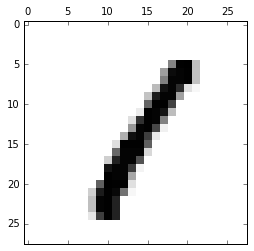

In [110]:
plt.matshow(ones[0].reshape(28, 28))  # change the 0 to another number to see some more zeros. Or try looking at some ones.

Now, we generate some new data set.

For the training labels y, we write as many 0's as the ``zeros`` array is long, the asame for ``ones``.

In [111]:
X_new = np.vstack([zeros, ones])  # this "stacks" the sets vertically
print("X_new.shape: ", X_new.shape)
y_new = np.hstack([np.repeat(0, zeros.shape[0]), np.repeat(1, ones.shape[0])])
print("y_new.shape: ", y_new.shape)
print("y_new: ", y_new)

X_new.shape:  (14780, 784)
y_new.shape:  (14780,)
y_new:  [0 0 0 ..., 1 1 1]


Shuffle before selecting the training and testing sets: Now we shuffle them around and create a training and test dataset.

In [112]:
from sklearn.utils import shuffle
X_new, y_new = shuffle(X_new, y_new)
X_mnist_train = X_new[:5000]
y_mnist_train = y_new[:5000]
X_mnist_test = X_new[5000:]
y_mnist_test = y_new[5000:]

Now let us learn a logistic regression model.

In [113]:
logreg.fit(X_mnist_train, y_mnist_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

... and visualize the coefficients.

We can see that the middle is dark, corresponding to  high positive values for where
a 1 would be. Around it is a lighter circle, corresponding to the position of a 0.

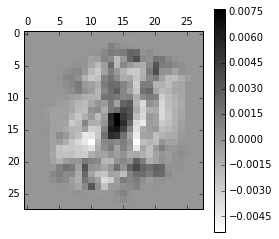

In [114]:
plt.matshow(logreg.coef_.reshape(28, 28))
plt.colorbar()

Finally, let as look at the accuracy on training and test set:

In [115]:
print("Accuracy training set:", logreg.score(X_mnist_train, y_mnist_train))
print("Accuracy test set:", logreg.score(X_mnist_test, y_mnist_test))

Accuracy training set: 1.0
Accuracy test set: 0.998057259714


Playing around with this notebook
=================================
1. What would be the accuracy of a completely random predictor on the first dataset?

2. Can you still pick out the class yourself if you set the ``cluster_std`` to ``10`` in ``make_blobs``? Can logistic regression do it?

3. Try to separate some other digit classes from MNIST. Which are hard, which are not?

4. Visualize the classes 0 and 1 using PCA down to two dimensions. Use a scatter plot as above. Would you expect they can be separated with a linear classifier?